## Student Information
Name: 馮卲哲

Student ID: 113062604

GitHub ID: phoneTWS1

Kaggle name: shaochefeng

Kaggle private scoreboard snapshot:

![scoreboard_snapshot](images/scoreboard_snapshot.png)

---

## Instructions

First: This part is worth 30% of your grade. Do the take home exercises in the DM2024-Lab2-master Repo. You may need to copy some cells from the Lab notebook to this notebook.

Second: This part is worth 30% of your grade. Participate in the in-class Kaggle Competition regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking:

Bottom 40%: Get 20% of the 30% available for this section.

Top 41% - 100%: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)
Submit your last submission BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday). Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the img folder of this repository and rerun the cell Student Information.

Third: This part is worth 30% of your grade. A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.

Fourth: This part is worth 10% of your grade. It's hard for us to follow if your code is messy :'(, so please tidy up your notebook.

Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday).

---
## Exericises


### **>>> Exercise 1 (Take home):**  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


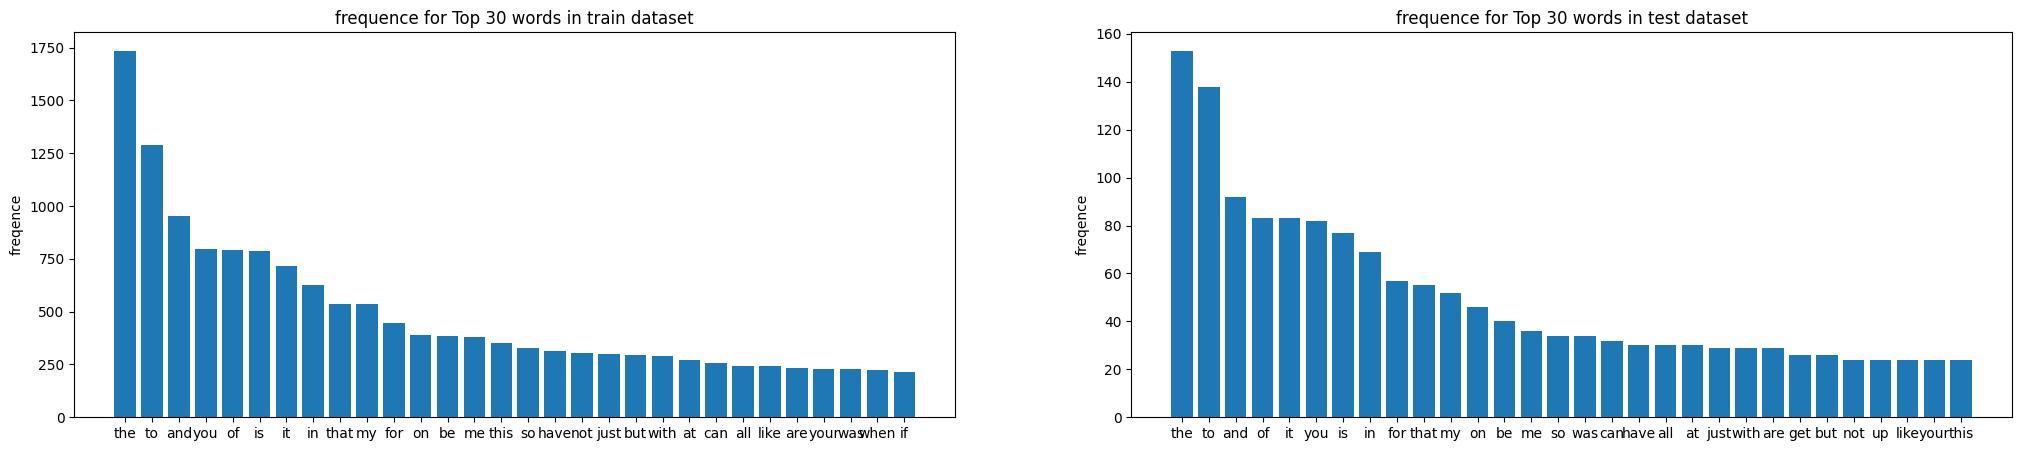

In [27]:
# Answer here
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def plot_freq_word(df, num_top=30):
    count_vect = CountVectorizer()
    counts = count_vect.fit_transform(df.text).toarray()
    term = count_vect.get_feature_names_out()
    term_fq = counts.sum(axis=0)
    term_fq_df = pd.DataFrame({'term':term, 'freq': term_fq})
    fq_sort = term_fq_df.sort_values(by='freq',ascending=False)[0:num_top]
    plt.bar(fq_sort['term'], fq_sort['freq'])
    plt.ylabel('freqence')

plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title('frequence for Top 30 words in train dataset')
plot_freq_word(train_df)
plt.subplot(1,2,2)
plot_freq_word(test_df)
plt.title('frequence for Top 30 words in test dataset')
plt.show()


### **>>> Exercise 2 (Take home):**  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [38]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

df = train_df
tfidf_vect = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
x = tfidf_vect.fit_transform(df.text)
feature_names_1000=tfidf_vect.get_feature_names_out()
feature_names_1000[100:110]


array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

### **>>> Exercise 3 (Take home):**  
Can you interpret the results above? What do they mean?

1. Out of the anger class, 57 instances were correctly predicted, while 18 were misclassified as fear, 6 as joy, and 3 as sadness.
2. Out of the fear class, 76 instances were correctly predicted, while 16 were misclassified as anger, 9 as joy, and 9 as sadness.
3. Out of the joy class, 56 instances were correctly predicted, while 6 were misclassified as anger, 9 as fear, and 8 as sadnes.
4. Out of the sadness class, 47 instances were correctly predicted, while 7 were misclassified as anger, 13 as fear, and 7 as joy.

### **>>> Exercise 4 (Take home):**  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



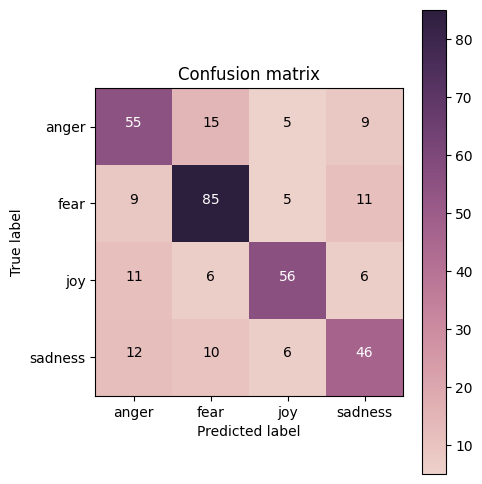

In [45]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix


X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_test_pred))
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### **>>> Exercise 5 (Take home):**  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [65]:
# Answer here


### **>>>Exercise 6 (Take home):**  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

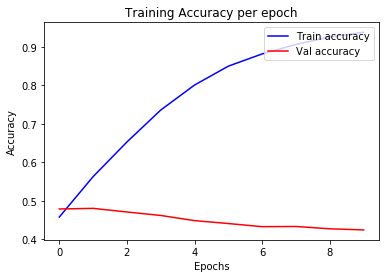


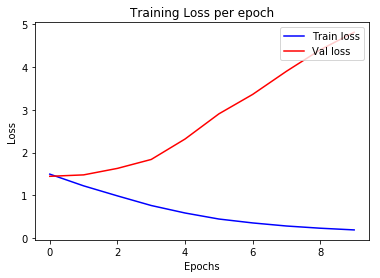

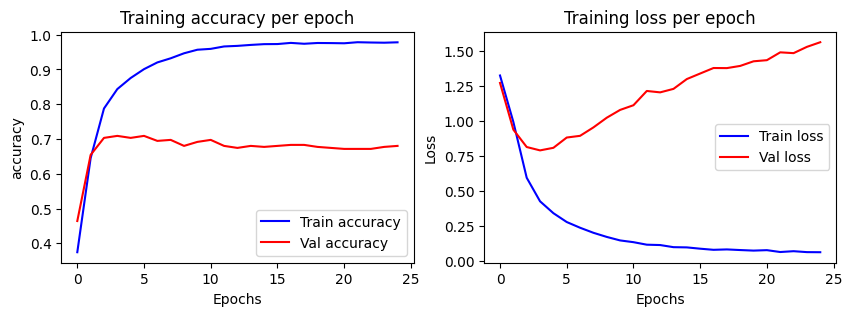

In [62]:
# Answer here
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(training_log['epoch'], training_log['accuracy'], label='Train accuracy',color='blue')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Val accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training accuracy per epoch')
plt.subplot(1,2,2)
plt.plot(training_log['epoch'], training_log['loss'], label='Train loss',color='blue')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Val loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training loss per epoch')
plt.show()

For the above figure we can observe that:
1. Valiation accuracy increase at the begining of the training; however, remain allmos the same as the training progresses.
2. Validation loss decreases at the beginning of the training; however, it starts to increase as the training progresses.
These observation suggest that the model is overfitting

### **>>> Exercise 7 (Take home):**  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [16]:
# Answer here
# sum up all the token's word2vect embedding
def token2embedding(tokens):
    representation = np.zeros(100)
    for t in tokens:
        representation+=word2vec_model.wv[t]
    return representation

train_df['word2vect_representation'] = train_df['text_tokenized'].apply(lambda x: token2embedding(x))
train_df[['text','word2vect_representation']].head()

,text,word2vect_representation
1443,#India right of reply at #UNGA - #Pakistan pre...,"[-1.0953547013923526, 18.002931036055088, -1.0..."
705,Skipping meals is the national way of showing ...,"[-1.4334964705340099, 7.477654941380024, 0.880..."
1396,Although this war will be under the guise of c...,"[-2.9987509581260383, 15.132663705386221, 3.03..."
2215,@chrisrock brings back great memories of hilar...,"[-0.2742487173527479, 5.16166571341455, -0.990..."
259,@saclivin @MrsCagg specific &amp; intentional ...,"[-4.646445179707371, 8.59365224186331, -6.7720..."


### **>>> Exercise 8 (Take home):**  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [53]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in word2vec_model.wv.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in word2vec_model.wv.most_similar('angry', topn=topn)]        
data_words = ['sad'] + [word_ for word_, sim_ in word2vec_model.wv.most_similar('sad', topn=topn)]        
mining_words = ['fear'] + [word_ for word_, sim_ in word2vec_model.wv.most_similar('fear', topn=topn)]        

target_words = happy_words + angry_words + data_words + mining_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

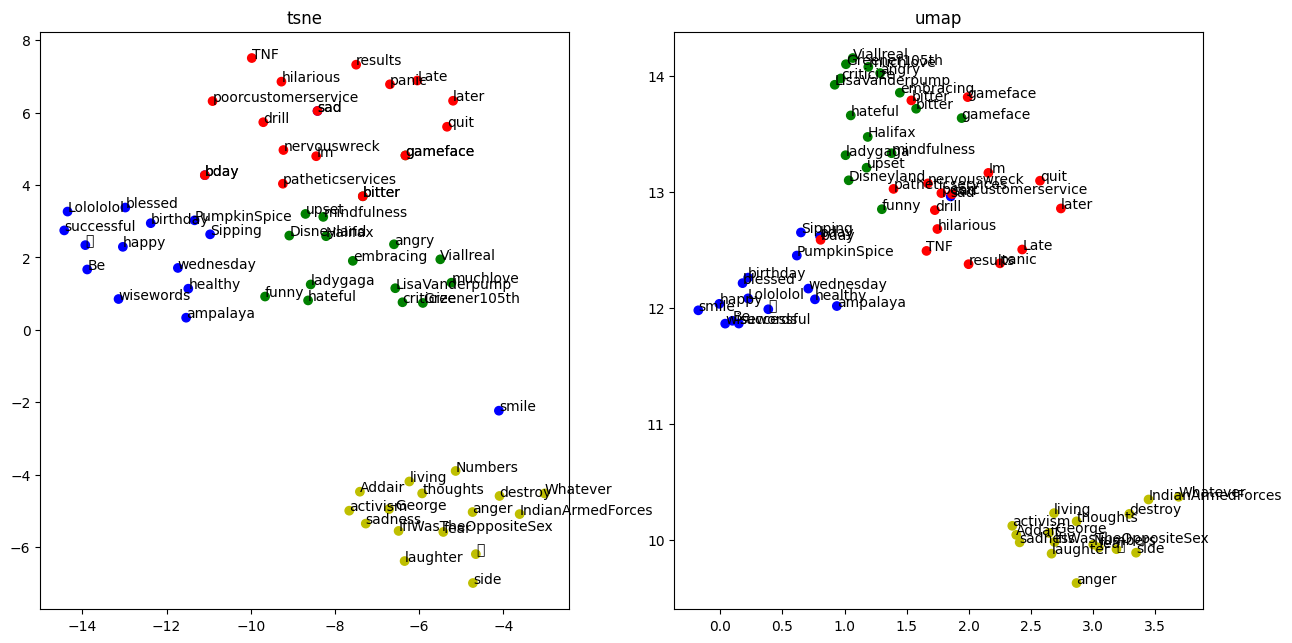

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap


## w2v model
model = word2vec_model.wv

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
## training
X_tsne = tsne.fit_transform(X_train)
X_umap = umap_model.fit_transform(X_train)


## plot the result
plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.title('tsne')
## plot the result
plt.subplot(1,2,2)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.title('umap')
plt.show()

As illustrated in the above figures, it appears that UMAP performs better in separating the 'happy,' 'angry,' 'sad,' and 'fear' classes within this dataset.

### **>>> Exercise 9 (Take home):**  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

1. system: Used to set the behavior, style, or rules for the assistant and provides context or guidelines before the conversaton begin.
2. user: Represents the user of the application.
3. assistant: Respresents the LLM responding to the user's queries.
```
ollama = Ollama()
message = [
    {'role': 'system',
     'content': 'You are a helpful assistant to help me with my Data Minning homework' },
    {'role': 'user',
     'content': 'Can you explain what is the Data Maining in one sentanece'},
    {'role': 'Data mining is the process of automatically identifying patterns and relationships within large datasets to gain insights, make predictions, or inform business decisions.'},
    {'role': 'user',
     'content': 'Thank you. I hava no idea what are you talking about.'}
]
response = ollama.chat(model='llama3.2: 1b', message=message)
```

### **>>> Exercise 10 (Take home):**  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [1]:
# Answer here
import ollama
from IPython.display import display, Markdown, Latex
#display(Markdown('*some markdown* $\phi$')

In [6]:
response = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is the picture about)',
        'images': ['./pics/Starry_Night.jpg']
    },
])
display(Markdown(response['message']['content']))


The image you've shared is a beautiful representation of Vincent van Gogh's "Starry Night" painted in his distinctive post-impressionist style. The painting vividly captures the night sky, filled with swirling patterns and bright stars that radiate a warm yellow glow against the deep blue backdrop. 

In contrast to the ethereal sky, the foreground of the painting features a tranquil village nestled amidst lush green hills. The village is dotted with quaint houses, each characterized by their red roofs and white walls that stand out against the surrounding verdant landscape. 

The overall composition of the painting creates a striking juxtaposition between the dynamic, swirling sky above and the serene, static life below, embodying van Gogh's unique artistic vision.

![Starry Night](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/800px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg)

### **>>> Exercise 11 (Take home):**  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [1]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2:1b" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(urls):
    loader = WebBaseLoader(
        web_paths=urls,
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

urls=["https://anitalianinmykitchen.com/authentic-homemade-pasta/",
     "https://anitalianinmykitchen.com/ricotta-chocolate-chip-muffins/",
    "https://anitalianinmykitchen.com/creamy-hot-chocolate-with-whipped-cream-frozen-floats/"]
# Create the retriever
retriever = load_and_retrieve_docs(urls)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2:1b', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

USER_AGENT environment variable not set, consider setting it to identify your requests.
C:\Users\jerry\AppData\Local\Temp\ipykernel_22000\3009637838.py:22: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model


In [3]:
from IPython.display import display, Markdown, Latex

In [4]:
# Use the RAG chain
result = rag_chain("How to make pasta")
display(Markdown(result))

Here's a step-by-step guide on how to make pasta:

**Step 1: Prepare the Dough**

* Place flour in a well on a flat surface
* Make a well in the middle of the flour
* Crack in an egg and gently start to combine the dough with the flour using a fork or your hands, starting from the inner rim of the well
* Add olive oil and salt to the mixture, continuing to work the dough until it comes together
* Cover the dough with a clean cloth and let rest for 30 minutes

**Step 2: Knead the Dough**

* After the dough has rested, turn it out onto a floured surface
* Gently knead the dough for 10-15 minutes, until it becomes smooth and elastic
* Use a pushing-down motion with your palms to stretch and fold the dough
* Rotate the dough every few minutes to ensure even development

**Step 3: Roll Out the Dough**

* Divide the dough into 4 equal pieces
* Flatten each piece of dough using your hands, or use a rolling pin to roll out each piece into thin sheets (about 1/16 inch thick)
* Keep the dough well-floured to prevent sticking

**Step 4: Cut and Shape the Pasta**

* Use a pasta machine to cut the rolled-out dough into fettuccine
* Alternatively, you can use a sharp knife or scissors to cut the pasta into individual sheets
* Once cut, shape each sheet of pasta into thin strips, using your hands to gently flatten them

**Step 5: Cook the Pasta**

* Bring a large pot of salted water to a boil
* Gently add the shaped pasta to the boiling water and cook for 2-3 minutes, or until al dente
* Use a slotted spoon to remove the cooked pasta from the water and drain off excess water

**Step 6: Serve the Pasta**

* Toss the cooked pasta with your desired sauce (such as olive oil, meat sauce, or bolognese ragù)
* Add grated Parmesan cheese for extra flavor
* Serve hot and enjoy!

In [5]:
result = rag_chain("How to make muffins")
display(Markdown(result))

To make these delicious ricotta chocolate chip muffins, follow these steps:

1. Prepare your wet ingredients:
   - Whisk together egg, milk, oil, and vanilla until combined.
2. Combine the wet mixture with the dry ingredients:
   - In a medium bowl, whisk together the egg mixture, ricotta, and vanilla.
   - Add the dry ingredients (flour, sugar, baking powder) and stir just until combined.

3. Fill prepared muffin cups:
   - Pour about 1/4 cup of the wet-ricotta mixture into each muffin cup.
   - Top with chocolate chips.

4. Bake:
   - Preheat your oven to 375°F (190°C).
   - Place the muffins on a baking sheet lined with parchment paper and bake for 18-20 minutes, or until a toothpick inserted in the center of a muffin comes out clean with a few crumbs attached.
5. Cool:
   - Let the muffins cool completely in the pan before transferring them to a wire rack to cool further.

6. Dust with powdered sugar:
   - Once cooled, dust the muffins with powdered sugar before serving.

Tips for baking:

* To ensure that your ricotta cheese doesn't curdle or separate during baking, use it within 24 hours of opening.
* Don't overmix the wet and dry ingredients; this can lead to tough muffins.
* Use high-quality chocolate chips for the best flavor.

In [6]:
result = rag_chain("How to make hot chocolate")
display(Markdown(result))

You're looking to make a delicious homemade version of hot chocolate. Here's a recipe that incorporates cocoa powder and real chocolate for a richer flavor:

Ingredients:

* 2 cups milk (whole, 2%, or skim)
* 2 tablespoons unsweetened cocoa powder
* 2 tablespoons granulated sugar (or to taste)
* 1/4 teaspoon salt
* 2 tablespoons melted butter or oil
* 1 teaspoon vanilla extract
* Optional toppings: mini marshmallows, whipped cream, chocolate shavings, or chopped nuts

Instructions:

1. In a medium bowl, whisk together the milk, cocoa powder, sugar, and salt until well combined.
2. Add the melted butter or oil and whisk until smooth.
3. Stir in the vanilla extract.
4. If desired, add mini marshmallows, whipped cream, chocolate shavings, or chopped nuts to the mixture and stir gently to combine.
5. Fill prepared muffin cups about 2/3 full of the hot chocolate mixture.
6. Bake in a preheated oven at 375°F (190°C) for 15-20 minutes, or until a toothpick inserted into the center of a muffin comes out clean with a few crumbs attached.

Tips:

* For an extra-rich hot chocolate, use high-quality cocoa powder and real chocolate pieces.
* Adjust the amount of sugar to your taste. You can also add more if you prefer it sweeter.
* If you don't have a muffin tin, you can make individual servings in small ramekins or cups.
* Consider adding a pinch of salt to balance out the sweetness and bring out the flavors.

This recipe makes about 12-15 hot chocolate servings. You can easily store any leftovers in an airtight container in the fridge for up to 3 days or freeze for up to 2 months.

### **>>> Exercise 12 (Take home):**

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

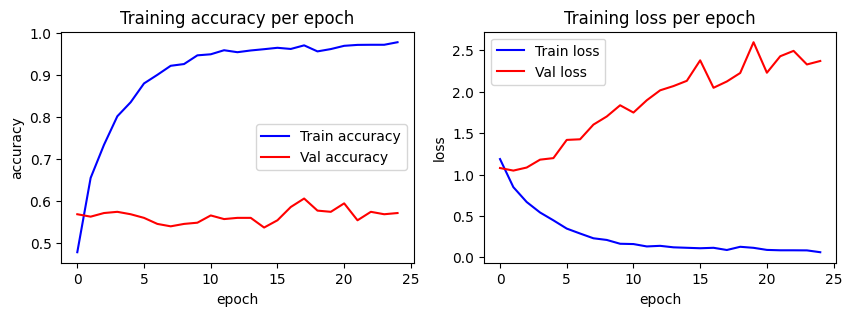

In [13]:
# Answer here
from matplotlib import pyplot as plt

train_log = pd.read_csv('logs/training_log_2.csv')
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(train_log['epoch'],train_log['accuracy'], color='blue', label='Train accuracy')
plt.plot(train_log['epoch'],train_log['val_accuracy'],color='red', label='Val accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training accuracy per epoch')
plt.subplot(1,2,2)
plt.plot(train_log['epoch'],train_log['loss'],color='blue', label='Train loss')
plt.plot(train_log['epoch'],train_log['val_loss'],color='red', label='Val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Training loss per epoch')
plt.show()

1. The performace of NN is slightly better then the KNN but it remains still pretty poor.
2. The performance is significantly better when using a Bag-of-Words (BoW) approach compared to LLM embeddings, even with a simple model like the Naive Bayes Classifier
3. Since the LLM embeddings have 3072 dimensions, this could potentially lead to the curse of dimensionality, which may explain why KNN performs poorly.
4. The curse of dimensionality, combined with the small size of the dataset, might be the reason why the neural network (NN) is overfitting.

### **>>> Exercise 13 (Take home):**

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

From the above experiments, the accuracy of the zero-shot, one-shot, and five-shot scenarios is 43.7%, 46.25%, and 51.25%, respectively. This demonstrates that LLMs can achieve better performance when provided with more examples.

---

## **Kaggle Competition** 

###  Data preparation
In this section, several tasks are performed to prepare the data.
- Load data: The data is first loaded from various CSV files.
- Extract important feature: After examining the raw data in tweet_DM.json, I found that important features such as hashtags, text, and id are nested within the _source field. These features need to be extracted.
- Saperate data: Based on the `id` and `identification` columns in the `data_identification.csv` file, the data is separated accordingly.
- Assign emotion: Based on the `id` and `emotion` columns in the `emotion.csv` file, each tweet is assigned with its corresponding sentiment.
- Drop irrelevent columns: We assume that `_score`, `_index`, `_source`, `_crawldate`,and `_type` are irrelevant features for determining a tweet's sentiment. The `hastage` is also dropped since too many rows have empty values for this field
- Tokenize: The `text` is tokenized for latter tasks.
- Save data: The preprocessed data is then saved in a pickle file to avoid repeating the preprocessing steps each time.

#### >> Load data.

In [1]:
import pandas as pd

In [5]:
iden = pd.read_csv('./data/data_identification.csv')
emo_iden = pd.read_csv('./data/emotion.csv')

In [3]:
df = pd.read_json('./data/tweets_DM.json', lines=True)

In [4]:
df.shape, iden.shape, emo_iden.shape

((1867535, 5), (1867535, 2), (1455563, 2))

In [5]:
df.head()

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets


#### >> Extract important feature

In [6]:
df['id'] = df.apply(lambda x: x['_source']['tweet']['tweet_id'], axis=1)
df['hastages'] = df.apply(lambda x: x['_source']['tweet']['hashtags'], axis=1)
df['text'] = df.apply(lambda x: x['_source']['tweet']['text'],axis=1)

In [7]:
df.head()

,_score,_index,_source,_crawldate,_type,id,hastages,text
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,0x2de201,[],"""Trust is not the same as faith. A friend is s..."


#### >> Saperate data.

In [8]:
train_ids = iden[iden['identification']=='train']['tweet_id'].to_list()
test_ids = iden[iden['identification']=='test']['tweet_id'].to_list()
train_df = df[df['id'].isin(train_ids)]
test_df = df[df['id'].isin(test_ids)]

In [9]:
train_df.shape, test_df.shape

((1455563, 8), (411972, 8))

#### >> Assign emotion

In [6]:
emotion = set(emo_iden['emotion'].to_list())
print(emotion)

{'surprise', 'disgust', 'trust', 'fear', 'sadness', 'anticipation', 'joy', 'anger'}


In [7]:
emo_ids = {}
for emo in emotion:
    emo_ids[emo] = emo_iden[emo_iden['emotion']==emo]['tweet_id'].to_list()

In [12]:
emo_df = {}
for emo in emotion:
    emo_df[emo] = train_df[train_df['id'].isin(emo_ids[emo])]

In [20]:
for emo in emotion:
    emo_df[emo]['emotion'] = emo

In [14]:
train_df = pd.DataFrame()
for emo in emotion:
    train_df = pd.concat([train_df,emo_df[emo]],ignore_index=True)

In [15]:
train_df.head()

,_score,_index,_source,_crawldate,_type,id,hastages,text,emotion
0,568,hashtag_tweets,"{'tweet': {'hashtags': ['crazy'], 'tweet_id': ...",2017-05-21 03:34:51,tweets,0x1d5cff,[crazy],@realDonaldTrump Do you even care how much peo...,surprise
1,428,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1f50...",2015-08-15 23:55:23,tweets,0x1f50a8,[],@realDonaldTrump Look! Over there! <LH>,surprise
2,698,hashtag_tweets,"{'tweet': {'hashtags': ['girls', 'trade', 'dm'...",2017-12-09 07:11:08,tweets,0x356c68,"[girls, trade, dm, add, ass, tits, dick, pussy]",Who's horny? Snapchat me jchrisco19 <LH> <LH> ...,surprise
3,704,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2b73...",2015-06-10 03:11:07,tweets,0x2b7343,[],The most unrealistic thing about this show is ...,surprise
4,437,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x23f0...",2017-09-01 23:57:16,tweets,0x23f049,[],@DonaldJTrumpJr no curry and no coffee..... <LH>,surprise


#### >> Drop irrelevent columns

In [16]:
train_df.drop(columns=['_score','_index','_source','_crawldate','_type','hastages',],inplace=True)
test_df.drop(columns=['_score','_index','_source','_crawldate','_type','hastages'],inplace=True)

C:\Users\jerry\AppData\Local\Temp\ipykernel_20552\3300250631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns=['_score','_index','_source','_crawldate','_type'],inplace=True)


In [34]:
train_df.head()

,id,text,emotion
0,0x1d5cff,@realDonaldTrump Do you even care how much peo...,surprise
1,0x1f50a8,@realDonaldTrump Look! Over there! <LH>,surprise
2,0x356c68,Who's horny? Snapchat me jchrisco19 <LH> <LH> ...,surprise
3,0x2b7343,The most unrealistic thing about this show is ...,surprise
4,0x23f049,@DonaldJTrumpJr no curry and no coffee..... <LH>,surprise


In [36]:
test_df.head()

,id,text
2,0x28b412,"Confident of your obedience, I write to you, k..."
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
9,0x218443,When do you have enough ? When are you satisfi...
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #..."
33,0x26289a,"In these tough times, who do YOU turn to as yo..."


#### >> Tokenized

In [37]:
for emo in emotion:
    emotion_df[emo]['text_tokenize'] = emotion_df[emo]['text'].apply(lambda x: nltk.word_tokenize(x))
    print(f'{emo} finished')

C:\Users\jerry\AppData\Local\Temp\ipykernel_15140\2074421133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_df[emo]['text_tokenize'] = emotion_df[emo]['text'].apply(lambda x: nltk.word_tokenize(x))


anger finished
anticipation finished
disgust finished
fear finished
joy finished
sadness finished
surprise finished
trust finished


In [41]:
train_df = pd.DataFrame()
for emo in emotion:
    train_df = pd.concat([train_df,emotion_df[emo]],ignore_index=True)

In [39]:
test_df['text_tokenize']=test_df['text'].apply(lambda x: nltk.word_tokenize(x))

In [46]:
train_df.head()

,id,text,emotion,text_tokenize
0,0x1fde89,Can someone tell my why my feeds scroll back t...,anger,"[Can, someone, tell, my, why, my, feeds, scrol..."
1,0x269112,My brother didn't tell me he was going to horr...,anger,"[My, brother, did, n't, tell, me, he, was, goi..."
2,0x2452c9,Millions of purple cushion-footed balderdash !...,anger,"[Millions, of, purple, cushion-footed, balderd..."
3,0x2ac7bd,Hangry and ready to snap. #hangry <LH> #needfo...,anger,"[Hangry, and, ready, to, snap, ., #, hangry, <..."
4,0x2d29d1,<LH> that’s how we women are. So we are tweeti...,anger,"[<, LH, >, that, ’, s, how, we, women, are, .,..."


In [44]:
test_df.head()

,id,text,text_tokenize
2,0x28b412,"Confident of your obedience, I write to you, k...","[Confident, of, your, obedience, ,, I, write, ..."
4,0x2de201,"""Trust is not the same as faith. A friend is s...","[``, Trust, is, not, the, same, as, faith, ., ..."
9,0x218443,When do you have enough ? When are you satisfi...,"[When, do, you, have, enough, ?, When, are, yo..."
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #...","[God, woke, you, up, ,, now, chase, the, day, ..."
33,0x26289a,"In these tough times, who do YOU turn to as yo...","[In, these, tough, times, ,, who, do, YOU, tur..."


#### >> Save data

In [47]:
train_df.to_pickle('./data/train_df.pkl')
test_df.to_pickle('./data/test_df.pkl')

In [48]:
import pandas as pd

train_df = pd.read_pickle('./data/train_df.pkl')
test_df = pd.read_pickle('./data/test_df.pkl')

---
### Exploratory data analysis (EDA)
In this section, exploratory data analysis is performed. I discovered that the data is imbalanced. Therefore, a resampling technique is applied to address this issue. However, after the resampling the data decome extremly large.

In [19]:
emo_len = []
for emo in emotion:
    emo_len.append(len(emo_ids[emo])/train_df.shape[0]*100)
    print(f'{emo}: {len(emo_ids[emo])}')

surprise: 48729
disgust: 139101
trust: 205478
fear: 63999
sadness: 193437
anticipation: 248935
joy: 516017
anger: 39867


<function matplotlib.pyplot.show(close=None, block=None)>

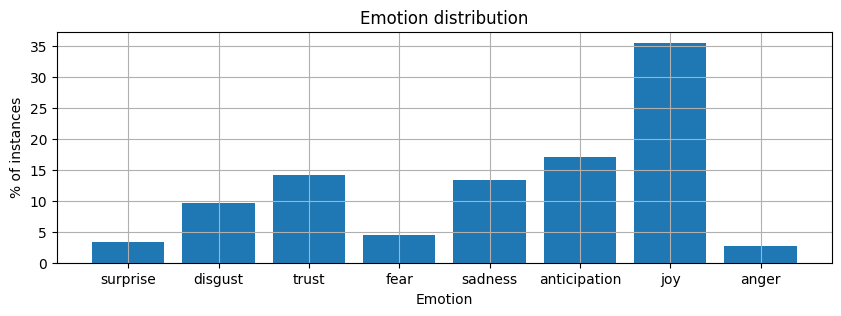

In [78]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(10,3))
plt.bar(list(emotion),emo_len)
plt.xlabel('Emotion')
plt.ylabel('% of instances')
plt.title('Emotion distribution')
plt.grid(True)
plt.show

In [4]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = train_df
y = train_df['emotion']
ros = RandomOverSampler(random_state=42)
train_resampled,y_resampled= ros.fit_resample(X,y)


In [5]:
train_resampled.shape, y_resampled.shape

((4128136, 4), (4128136,))

In [76]:
res_emo_len = []
for emo in emotion:
    res_emo_len.append(len(train_resampled[train_resampled['emotion']==emo]))
    print(f'{emo}: {res_emo_len[-1]}')

surprise: 516017
disgust: 516017
trust: 516017
fear: 516017
sadness: 516017
anticipation: 516017
joy: 516017
anger: 516017


<function matplotlib.pyplot.show(close=None, block=None)>

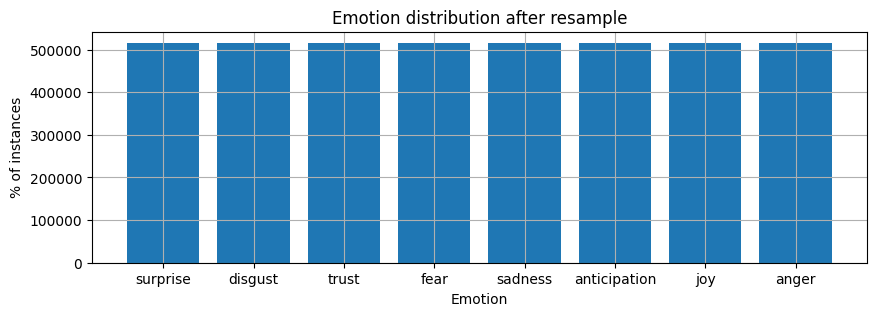

In [80]:
plt.figure(figsize=(10,3))
plt.bar(list(emotion),res_emo_len)
plt.xlabel('Emotion')
plt.ylabel('% of instances')
plt.title('Emotion distribution after resample')
plt.grid(True)
plt.show

---
### BoW and TFIDF
- In this section, Bag of Words (BoW) and TF-IDF are utilized to extract features. Given the large vocabulary size in this dataset, I chose 1000 as the dimension of the embedding vector for each tweet.
- A simple Multinomial Naive Bayes classifier is then used for predictions, serving as a baseline model. I found that the performance was similar when using either BoW or TF-IDF.
- Further examined the features chosen by BoW and TF-IDF and found that these features are hardly relevant to the sentiment of a tweet.
- Additionally, a 2-layer neural network is trained using BoW features for 10 epochs, and the performance is slightly better but still poor.

Conculsion:

Simple feature extraction techniques like BoW or TF-IDF may seem too naive for this task.

#### >> Bag of word

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

BOW_vec = CountVectorizer(max_features=1000)
BOW_vec.fit(train_df['text'])
train_BOW = BOW_vec.transform(train_resampled['text'])
test_BOW = BOW_vec.transform(test_df['text'])

In [7]:
train_BOW.shape, test_BOW.shape

((4128136, 1000), (411972, 1000))

##### >> Mutinomial Naive Bayes classifier train with BoW features

In [84]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_BOW, train_resampled['emotion'].to_numpy(), test_size=0.2, random_state=42)
NB_model = MultinomialNB()
NB_model = NB_model.fit(X_train,y_train)

In [88]:
y_train_pred = NB_model.predict(X_train)
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

       anger       0.35      0.37      0.36    412869
anticipation       0.42      0.46      0.44    412300
     disgust       0.32      0.35      0.33    413020
        fear       0.39      0.45      0.42    412795
         joy       0.35      0.31      0.33    413231
     sadness       0.41      0.29      0.34    412352
    surprise       0.33      0.32      0.33    412944
       trust       0.38      0.39      0.39    412997

    accuracy                           0.37   3302508
   macro avg       0.37      0.37      0.37   3302508
weighted avg       0.37      0.37      0.37   3302508



In [87]:
y_val_pred = NB_model.predict(X_val)
print(classification_report(y_true=y_val, y_pred=y_val_pred))

              precision    recall  f1-score   support

       anger       0.35      0.37      0.36    103148
anticipation       0.43      0.46      0.44    103717
     disgust       0.31      0.35      0.33    102997
        fear       0.39      0.45      0.42    103222
         joy       0.35      0.31      0.33    102786
     sadness       0.41      0.29      0.34    103665
    surprise       0.33      0.32      0.33    103073
       trust       0.38      0.39      0.38    103020

    accuracy                           0.37    825628
   macro avg       0.37      0.37      0.37    825628
weighted avg       0.37      0.37      0.37    825628




#### >>TF-IDF


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_vec = TfidfVectorizer(max_features=1000)
TFIDF_vec.fit(train_df['text'])
train_TFIDF = TFIDF_vec.transform(train_resampled['text'])
test_TFIDF = TFIDF_vec.transform(test_df['text'])

In [94]:
X_train, X_val, y_train, y_val = train_test_split(train_TFIDF, train_resampled['emotion'].to_numpy(), test_size=0.2, random_state=42)
NB_model = MultinomialNB()
NB_model = NB_model.fit(X_train,y_train)

##### >> Mutinomial Naive Bayes classifier train with TF-IDF features

In [95]:
y_train_pred = NB_model.predict(X_train)
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

       anger       0.35      0.40      0.37    412869
anticipation       0.44      0.48      0.46    412300
     disgust       0.31      0.37      0.33    413020
        fear       0.41      0.45      0.43    412795
         joy       0.36      0.31      0.33    413231
     sadness       0.41      0.29      0.34    412352
    surprise       0.35      0.31      0.33    412944
       trust       0.39      0.39      0.39    412997

    accuracy                           0.37   3302508
   macro avg       0.38      0.37      0.37   3302508
weighted avg       0.38      0.37      0.37   3302508



In [96]:
y_val_pred = NB_model.predict(X_val)
print(classification_report(y_true=y_val, y_pred=y_val_pred))

              precision    recall  f1-score   support

       anger       0.35      0.40      0.37    103148
anticipation       0.44      0.48      0.46    103717
     disgust       0.30      0.36      0.33    102997
        fear       0.41      0.45      0.43    103222
         joy       0.36      0.31      0.33    102786
     sadness       0.41      0.29      0.34    103665
    surprise       0.35      0.31      0.33    103073
       trust       0.39      0.38      0.38    103020

    accuracy                           0.37    825628
   macro avg       0.38      0.37      0.37    825628
weighted avg       0.38      0.37      0.37    825628



In [69]:
BOW_features = BOW_vec.get_feature_names_out()
for f in BOW_features[::5]:
    print(f,end=', ')

00, 03, 08, 12, 15pm, 1st, 22, 27, 30pm, 39, 45pm, about, action, against, album, alone, amazing, and, anyone, are, asked, away, bad, beautiful, bed, being, beyond, black, blood, both, break, broken, busy, called, cannot, cat, check, christ, close, college, company, continue, couldn, create, cute, date, deal, definitely, died, do, don, down, dude, early, either, enough, evening, everyone, expect, facebook, fall, far, feel, few, finally, first, followers, forever, foxnews, friends, full, gameofthrones, gets, give, go, gone, gotta, greatest, guy, hair, happen, happy, haven, healthy, hell, hey, his, holy, hour, human, if, insecure, instead, it, join, just, kill, know, last, lead, leave, level, light, listening, living, long, lord, love, lt, made, man, maybe, meet, message, minutes, mom, money, morning, move, music, need, new, night, november, off, old, one, opportunity, our, paid, passion, perfect, pick, plan, poetry, post, ppl, praying, problem, push, rain, ready, really, remember, rock,

In [70]:
TFIDF_features = TFIDF_vec.get_feature_names_out()
for f in TFIDF_features[::5]:
    print(f,end=', ')

00, 03, 08, 12, 15pm, 1st, 22, 27, 30pm, 39, 45pm, about, action, against, album, alone, amazing, and, anyone, are, asked, away, bad, beautiful, bed, being, beyond, black, blood, both, break, broken, busy, called, cannot, cat, check, christ, close, college, company, continue, couldn, create, cute, date, deal, definitely, died, do, don, down, dude, early, either, enough, evening, everyone, expect, facebook, fall, far, feel, few, finally, first, followers, forever, foxnews, friends, full, gameofthrones, gets, give, go, gone, gotta, greatest, guy, hair, happen, happy, haven, healthy, hell, hey, his, holy, hour, human, if, insecure, instead, it, join, just, kill, know, last, lead, leave, level, light, listening, living, long, lord, love, lt, made, man, maybe, meet, message, minutes, mom, money, morning, move, music, need, new, night, november, off, old, one, opportunity, our, paid, passion, perfect, pick, plan, poetry, post, ppl, praying, problem, push, rain, ready, really, remember, rock,

##### >> Neraul Network train with BoW features

In [13]:
import keras as keras

In [158]:
input_shape = len(BOW_vec.get_feature_names_out())
output_shape = len(list(emotion))

In [159]:
# input layer
model_input = keras.layers.Input(shape = (input_shape,))

# 1st hidden layer
x = keras.layers.Dense(units=64)(model_input)
x = keras.layers.ReLU()(x)

# 2st hidden layer
x = keras.layers.Dense(units=64)(x)
x = keras.layers.ReLU()(x)

# output layer
x = keras.layers.Dense(units=output_shape)(x)
output = keras.layers.Softmax()(x)

NN_BOW = keras.Model(inputs=model_input, outputs=output)
# loss function & optimizer
NN_BOW.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

NN_BOW.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          64,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_6 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_7 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_2 (Softmax)                  │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,744 (268.53 KB)

 Trainable params: 68,744 (268.53 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(train_resampled['emotion'])
print('check label: ', label_encoder.classes_)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']


In [115]:
emotion = label_encoder.classes_

In [116]:
def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

In [117]:
y_train = label_encode(label_encoder, train_resampled['emotion'])
print(y_train.shape)

(4128136, 8)


In [118]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_BOW, y_train, test_size=0.2, random_state=42)

In [120]:
csv_logger = keras.callbacks.CSVLogger('./logs/BOW_training_log.csv')
ckpts = keras.callbacks.ModelCheckpoint(
    filepath = 'BOW_checkpoint.keras',
    save_best_only = True,
    monitor = 'val_loss',
    verbose=1
)
epochs = 10
batch_size = 32
history = NN_BOW.fit(X_train,y_train,
                   epochs=epochs,
                   batch_size=batch_size,
                   callbacks=[csv_logger,ckpts],
                   validation_data=(X_val,y_val))
print('training finish')

Epoch 1/10
103202/103204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4885 - loss: 1.3929
Epoch 1: val_loss improved from inf to 1.42392, saving model to BOW_checkpoint.keras
103204/103204 ━━━━━━━━━━━━━━━━━━━━ 299s 3ms/step - accuracy: 0.4885 - loss: 1.3929 - val_accuracy: 0.4768 - val_loss: 1.4239
Epoch 2/10
103191/103204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4896 - loss: 1.3909
Epoch 2: val_loss improved from 1.42392 to 1.42191, saving model to BOW_checkpoint.keras
103204/103204 ━━━━━━━━━━━━━━━━━━━━ 319s 3ms/step - accuracy: 0.4896 - loss: 1.3909 - val_accuracy: 0.4801 - val_loss: 1.4219
Epoch 3/10
103185/103204 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4898 - loss: 1.3906
Epoch 3: val_loss did not improve from 1.42191
103204/103204 ━━━━━━━━━━━━━━━━━━━━ 347s 3ms/step - accuracy: 0.4898 - loss: 1.3906 - val_accuracy: 0.4791 - val_loss: 1.4229
Epoch 4/10
103193/103204 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4903 - loss: 1.3899
Epoch 4: val_loss improved from 1.42

---
#### Word2Vec

To address the limitation that Bag of Words (BoW) and TF-IDF features cannot effectively capture the sentiment in a tweet, Word2Vec features are utilized. In this section, I utilized a pre-trained Word2Vec model from Gensim to obtain word embeddings. To represent each tweet, the embeddings of all its words were summed to create a single vector representation. The predictions are then generated by a neural network. The following outlines the details of my approach and experiments:
- glove-twitter-50
  1. hidden layer: 64-64-8, data: balanced, epoch: 10
  2. hidden layer: 64-128-256-256-124-64-8, data: balanced, epoch: 19
  3. hidden layer: 64-128-256-256-128-64-8, data: unbalanced, epoch: 50

- glove-twitter-100

  1. hidden layer: 128-256-512-512-256-128-8, data: unbalanced, epoch: 30
  2. hidden layer: 128-256-512-512-512-512-256-128-8, data: unbalanced, epoch: 30

- glove-twiter-200
  1. hidden layer: 128-256-512-1024-1024-512-256-128-8, data: unbalanced, epoch: 30

In [33]:
from matplotlib import pyplot as plt
def plot_log(log):
    plt.figure(figsize=(10,2))
    epoch = log['epoch']
    plt.subplot(1,2,1)
    plt.plot(epoch,log['loss'], color='blue', label='Train loss')
    plt.plot(epoch,log['val_loss'], color='red', label='Val loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epoch,log['accuracy'], color='blue', label='Train accuracy')
    plt.plot(epoch,log['val_accuracy'], color='red', label='Val accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()

##### >> Result of glove-twitter-50

In [25]:
log_50_1 = pd.read_csv('./logs/w2v_training_log.csv')
log_50_2 = pd.read_csv('./logs/w2v_model2_training_log.csv')
log_50_3 = pd.read_csv('./logs/w2v_model3_training_log.csv')

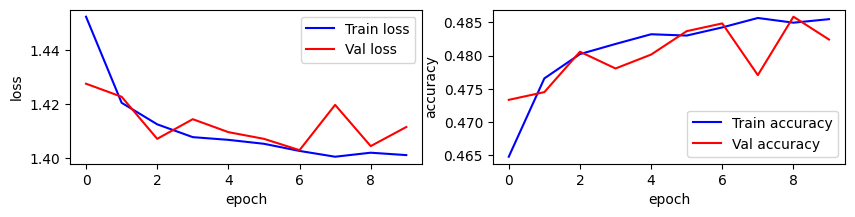

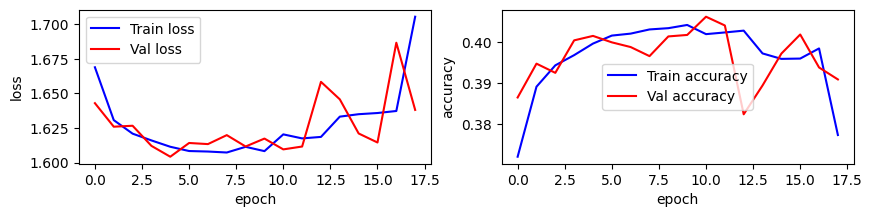

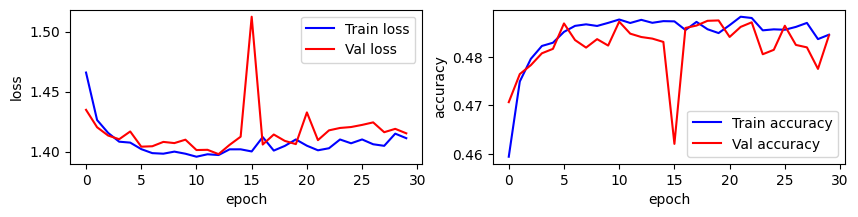

In [34]:
plot_log(log_50_1)
plot_log(log_50_2)
plot_log(log_50_3)

##### >> Result of glove-twitter-100

In [35]:
log_100_1 = pd.read_csv('./logs/glove_twitter_100_training_log.csv')
log_100_2 = pd.read_csv('./logs/glove_twitter_100_model2_training_log.csv')

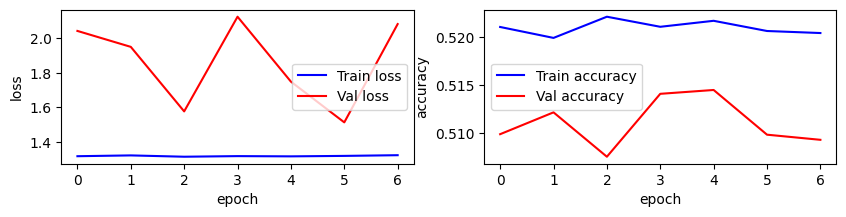

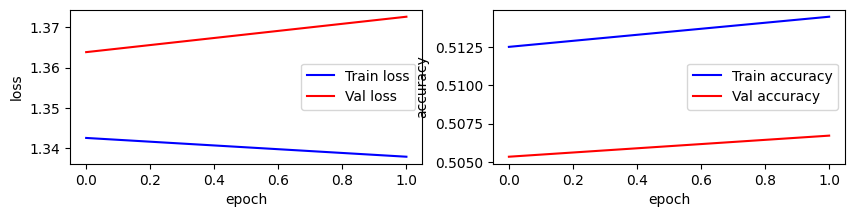

In [36]:
plot_log(log_100_1)
plot_log(log_100_2)

##### >> Result of glove-twitter-200

In [37]:
log_200 = pd.read_csv('./logs/glove_twitter_200_model1_training_log.csv')

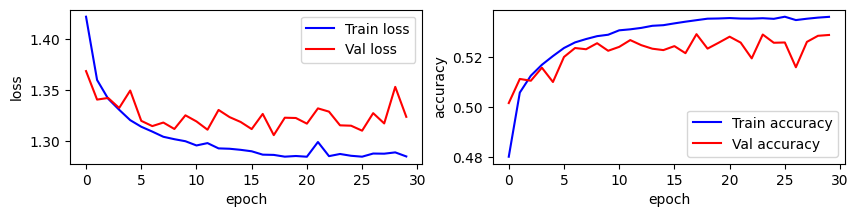

In [38]:
plot_log(log_200)

##### >> Below is an example of using the glove-Twitter-200 model as the Word2Vec representation.

In [96]:
# download the model
glove_twitter_200 = gensim.downloader.load('glove-twitter-200')

In [97]:
import numpy as np

stop_words = set(nltk.corpus.stopwords.words('english'))
def text2vec(words):
    filter_words = [word.lower() for word in words if word.lower() not in stop_words]
    vec = np.zeros(200,dtype=np.float32)
    for word in filter_words:
        if word in glove_twitter_200:
            vec+=glove_twitter_200[word]
    return vec


In [98]:
train_df['glove_twitter_200'] = train_df['text_tokenize'].apply(lambda x: text2vec(x))

In [7]:
train_df.to_pickle('./data/train_df.pkl')

In [9]:
# label to one-hot vector
from sklearn.preprocessing import LabelEncoder
import keras

label_encoder = LabelEncoder()
label_encoder.fit(y)
print('check label: ', label_encoder.classes_)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']
(1455563, 8)


In [100]:
X = train_df['glove_twitter_200'].to_numpy()
y = train_df['emotion']

In [101]:
y_label = label_encode(label_encoder, y)
print(y_label.shape)

(1455563, 8)


In [102]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y_label, test_size=0.2, random_state=42)

In [103]:
X_train = np.array([np.array(x).flatten() for x in X_train], dtype=np.float32)
X_val = np.array([np.array(x).flatten() for x in X_val], dtype=np.float32)

In [22]:
import keras as keras

In [104]:
input_shape = len(X_train[0])
output_shape = len(label_encoder.classes_)
input_shape,output_shape

(200, 8)

In [106]:
# input layer
model_input = keras.layers.Input(shape = (input_shape,))

# 1st hidden layer
x = keras.layers.Dense(units=128)(model_input)
x = keras.layers.ReLU()(x)

# 2st hidden layer
x = keras.layers.Dense(units=256)(x)
x = keras.layers.ReLU()(x)

# 3st hidden layer
x = keras.layers.Dense(units=512)(x)
x = keras.layers.ReLU()(x)

# 4st hidden layer
x = keras.layers.Dense(units=1024)(x)
x = keras.layers.ReLU()(x)

# 5st hidden layer
x = keras.layers.Dense(units=1024)(x)
x = keras.layers.ReLU()(x)

# 6st hidden layer
x = keras.layers.Dense(units=512)(x)
x = keras.layers.ReLU()(x)

# 7st hidden layer
x = keras.layers.Dense(units=256)(x)
x = keras.layers.ReLU()(x)

# 8st hidden layer
x = keras.layers.Dense(units=128)(x)
x = keras.layers.ReLU()(x)


# output layer
x = keras.layers.Dense(units=output_shape)(x)
output = keras.layers.Softmax()(x)

NN_w2v = keras.Model(inputs=model_input, outputs=output)
# loss function & optimizer
NN_w2v.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

NN_w2v.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 128)                 │          25,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_40 (ReLU)                      │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_41 (ReLU)                      │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_42 (ReLU)                      │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_43 (ReLU)                      │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_44 (ReLU)                      │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_45 (ReLU)                      │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_46 (ReLU)                      │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_47 (ReLU)                      │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 8)                   │           1,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_7 (Softmax)                  │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,455,304 (9.37 MB)

 Trainable params: 2,455,304 (9.37 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
csv_logger = keras.callbacks.CSVLogger('./logs/glove_twitter_200_model1_training_log.csv')
ckpts = keras.callbacks.ModelCheckpoint(
    filepath = 'glove_twitter_200_model1_checkpoint.keras',
    save_best_only = True,
    monitor = 'val_accuracy',
    verbose=1
)
epochs = 30
batch_size = 32
history = NN_w2v.fit(X_train,y_train,
                   epochs=epochs,
                   batch_size=batch_size,
                   callbacks=[csv_logger,ckpts],
                   validation_data=(X_val,y_val))
print('training finish')

Epoch 1/30
36389/36390 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4604 - loss: 1.4730
Epoch 1: val_accuracy improved from -inf to 0.50163, saving model to glove_twitter_200_model1_checkpoint.keras
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 767s 21ms/step - accuracy: 0.4604 - loss: 1.4730 - val_accuracy: 0.5016 - val_loss: 1.3688
Epoch 2/30
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5025 - loss: 1.3675
Epoch 2: val_accuracy improved from 0.50163 to 0.51125, saving model to glove_twitter_200_model1_checkpoint.keras
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 809s 22ms/step - accuracy: 0.5025 - loss: 1.3675 - val_accuracy: 0.5113 - val_loss: 1.3407
Epoch 3/30
36389/36390 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5135 - loss: 1.3403
Epoch 3: val_accuracy did not improve from 0.51125
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 803s 22ms/step - accuracy: 0.5135 - loss: 1.3403 - val_accuracy: 0.5105 - val_loss: 1.3423
Epoch 4/30
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5162 - l

---
#### Seq2seq model with attention

Since attention mechanisms have proven to be highly effective in NLP tasks, in this section a LuongAttention is utilized in a seq2seq model.
The validation accuracy show very high accuracy compare to the previous approuch even for just to epoch.

In [1]:
import pandas as pd
import re
import numpy as np
import os
import time
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import time

In [2]:
retrain_df = pd.read_pickle('./retrain_df.pkl')
retest_df = pd.read_pickle('./retest_df.pkl')

##### >> Text preprocessing

In [4]:
import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('',text)

def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [5]:
retrain_df['text'].values[:4]

array(['Can someone tell my why my feeds scroll back to the same 30 tweets that I saw 1 min ago? #Pissed!',
       "My brother didn't tell me he was going to horror nights tomorrow so now I'm not going <LH>",
       'Millions of purple cushion-footed balderdash ! <LH>',
       'Hangry and ready to snap. #hangry <LH> #needfood 😐'], dtype=object)

In [6]:
for text in retrain_df['text'].values[:4]:
    print(preprocess_text(text))

Can someone tell my why my feeds scroll back to the same tweets that saw min ago Pissed 
My brother didn tell me he was going to horror nights tomorrow so now m not going 
Millions of purple cushion footed balderdash 
Hangry and ready to snap hangry needfood 


In [7]:
X = []
sentences = list(retrain_df['text'])
for sen in sentences:
    X.append(preprocess_text(sen))

##### >> Encode emotion label into one-hot vector

In [8]:
from sklearn.preprocessing import LabelEncoder
import keras

label_encoder = LabelEncoder()
label_encoder.fit(retrain_df['emotion'])
print('check label: ', label_encoder.classes_)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)
y = label_encode(label_encoder,retrain_df['emotion'])

2024-11-26 12:33:18.831031: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-26 12:33:18.991409: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 12:33:19.506316: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib64:/usr/local/cuda-11.2/lib64:/usr/local/lib64:/usr/local/cuda-11.2/lib64::/home/ccchen/.mujoco/mujoco210/bin:/usr/lib/nvidia:/home/ccchen/anaconda3/lib:/home/ccchen/.mujoco/mujoco210/bin:/u

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']


In [10]:
# Split the training dataset and test dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("# training data: {:d}\n# test data: {:d}".format(len(X_train), len(X_val)))

# training data: 1164450
# test data: 291113


##### >> Text tokenized

In [11]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

max_len = 100
# padding sentences to the same length
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=max_len)
X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val, padding='post', maxlen=max_len)

In [12]:
X_train

array([[  26,   95,  258, ...,    0,    0,    0],
       [2048,  732,  131, ...,    0,    0,    0],
       [  80,   58,   96, ...,    0,    0,    0],
       ...,
       [  56,  163,   93, ...,    0,    0,    0],
       [  83, 9426, 1549, ...,    0,    0,    0],
       [  41,   64,   84, ...,    0,    0,    0]], dtype=int32)

In [ ]:
BUFFER_SIZE = len(X_train)
BATCH_SIZE = 128
steps_per_epoch = len(X_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
# only reserve 10000 words
vocab_size = 10000

dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(BATCH_SIZE, drop_remainder=True)


##### >> Model definition

In [16]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        # vacab_size=10000, embedding_dim=256 enc_units=1024 batch_sz=64
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.enc_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_activation='sigmoid',
                                       recurrent_initializer='glorot_uniform')

    def call(self, x, hidden):
        # x is the training data with shape == (batch_size，max_length)  -> (128, 100)
        # which means there are batch_size sentences in one batch, the length of each sentence is max_length
        # hidden state shape == (batch_size, units) -> (128, 1024)
        # after embedding, x shape == (batch_size, max_length, embedding_dim) -> (128, 100, 256)
        x = self.embedding(x)
        
        # output contains the state(in GRU, the hidden state and the output are same) from all timestamps,
        # output shape == (batch_size, max_length, units) -> (128, 100, 1024)
        # state is the hidden state of the last timestamp, shape == (batch_size, units) -> (128, 1024)
        output, state = self.gru(x, initial_state=hidden)
        
        return output, state

    def initialize_hidden_state(self):
        # initialize the first state of the gru,  shape == (batch_size, units) -> (128, 1024)
        return tf.zeros((self.batch_sz, self.enc_units))

In [17]:
class LuongAttention(tf.keras.Model):
    def __init__(self, units):
        super(LuongAttention, self).__init__()
        # learnable weight matrix of shape (hidden size, hidden size)
        self.W = tf.keras.layers.Dense(units)


    def call(self, query, values):
        # query shape == (batch size, hidden size)
        # values shape == (batch size, sequence length, hidden size)
        hidden_with_time_axis = tf.expand_dims(query,axis = 1)

        # transform values
        # shape == (batch size, sequence length, hiddensize)
        trans_enc_out = self.W(values)

        # score shape == (batch size, sequence lenght)
        score = tf.reduce_sum(trans_enc_out*hidden_with_time_axis, axis=2)

        # attention weigth shape == (batch size, sequence length,1)
        attention_weights = tf.nn.softmax(score, axis=1)
        attention_weights = tf.expand_dims(attention_weights, axis=2)

        # context_vector shape == (batch size,hidden size)
        context_vector = tf.reduce_sum(attention_weights*values, axis=1)

        return context_vector, attention_weights

In [18]:
class Decoder(tf.keras.Model):
    def __init__(self, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        
        # pass through four fully connected layers, the model will return 
        # the probability of the positivity of the sentence
        self.fc_1 = tf.keras.layers.Dense(2048)
        self.fc_2 = tf.keras.layers.Dense(512)
        self.fc_3 = tf.keras.layers.Dense(64)
        self.fc_4 = tf.keras.layers.Dense(8)

        # used for attention
        self.attention = LuongAttention(self.dec_units)

    def call(self, hidden, enc_output):
        context_vector, attention_weights = self.attention(hidden, enc_output)
        output = self.fc_1(context_vector)
        output = self.fc_2(output)
        output = self.fc_3(output)
        output = self.fc_4(output)

        return output, attention_weights

In [19]:
encoder = Encoder(vocab_size, embedding_dim, units, BATCH_SIZE)
decoder = Decoder(units, BATCH_SIZE)

In [76]:
LEARNING_RATE = 1e-3
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)
loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True, reduction='none')
accuracy_object = tf.keras.metrics.Accuracy()

def loss_function(real, pred):
    loss_ = loss_object(real, pred)
    return tf.reduce_mean(loss_)

In [21]:
import os
checkpoint_dir = '/mnt/large-disk/jerryfeng/ckpts/DMLab2/checkpoints/sentiment-analysis'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)
ckpt_manager = tf.train.CheckpointManager(checkpoint,checkpoint_dir,max_to_keep=2)

##### >>Training

In [22]:
@tf.function
def train_step(inp, targ, enc_hidden):
    loss = 0

    with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)

        # passing enc_output to the decoder
        predictions, _ = decoder(enc_hidden, enc_output)

        loss = loss_function(targ, predictions)

    # collect all trainable variables
    variables = encoder.trainable_variables + decoder.trainable_variables

    # calculate the gradients for the whole variables
    gradients = tape.gradient(loss, variables)

    # apply the gradients on the variables
    optimizer.apply_gradients(zip(gradients, variables))

    return loss

In [28]:
@tf.function
def validation_step(inp, targ, enc_hidden):
    enc_ouput, enc_hidden = encoder(inp, enc_hidden)
    predictions, _ = decoder(enc_hidden, enc_ouput)
    targ_id = tf.reshape(tf.argmax(targ, axis=1),(-1,1))
    pred_id = tf.reshape(tf.argmax(predictions, axis=1),(-1,1))
    accuracy_object.update_state(pred_id,targ_id)

In [31]:
# set the epochs for training
EPOCHS = 10

for epoch in range(EPOCHS):
    
    start = time.time()
    # training
    # get the initial hidden state of gru
    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0

    with tqdm(enumerate(dataset), total=len(dataset), desc=f"Epoch {epoch+1}", unit='batch') as pbar:
        for (batch, (inp, targ)) in pbar:
            batch_loss = train_step(inp, targ, enc_hidden)
            total_loss += batch_loss
            pbar.set_postfix(batch_loss=batch_loss.numpy())
    
    #validation
    enc_hidden = encoder.initialize_hidden_state()
    with tqdm(enumerate(val_dataset), total=len(val_dataset), desc=f'Epoch{epoch+1}', unit='batch') as vpbar:
        for(batch, (inp, targ)) in vpbar:
            validation_step(inp, targ, enc_hidden)
            vpbar.set_postfix(val_accuracy = accuracy_object.result().numpy())
    
    
    save_path = ckpt_manager.save()


    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                        total_loss / steps_per_epoch))
    print("Saved checkpoint for epoch {}: {}".format(epoch+1, save_path))

    

Epoch1: 100%|██████████| 2274/2274 [00:41<00:00, 54.85batch/s, val_accuracy=0.812]


Saved checkpoint for epoch 1: /mnt/large-disk/jerryfeng/ckpts/DMLab2/checkpoints/sentiment-analysis/ckpt-2
Epoch 1 Loss 1.2604
Saved checkpoint for epoch 1: /mnt/large-disk/jerryfeng/ckpts/DMLab2/checkpoints/sentiment-analysis/ckpt-2


Epoch2: 100%|██████████| 2274/2274 [00:41<00:00, 54.84batch/s, val_accuracy=0.756]


Saved checkpoint for epoch 2: /mnt/large-disk/jerryfeng/ckpts/DMLab2/checkpoints/sentiment-analysis/ckpt-3
Epoch 2 Loss 1.1931
Saved checkpoint for epoch 2: /mnt/large-disk/jerryfeng/ckpts/DMLab2/checkpoints/sentiment-analysis/ckpt-3


Epoch 3:   0%|          | 0/9097 [00:01<?, ?batch/s]


KeyboardInterrupt: 

In [40]:
checkpoint.restore('/mnt/large-disk/jerryfeng/ckpts/DMLab2/checkpoints/sentiment-analysis/ckpt-2')

In [41]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test))
test_dataset = test_dataset.batch(BATCH_SIZE, drop_remainder=False)

In [44]:
@tf.function
def test_step(inp, enc_hidden):
    with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)
        predictions, attention_weights = decoder(enc_hidden, enc_output)
    return predictions, attention_weights

In [ ]:
for batch,(inp) in enumerate(test_dataset):
    if len(inp) !=BATCH_SIZE:
        enc_hidden = tf.zeros((len(inp), units))
    if batch == 0:
        predictions, _ = test_step(inp, enc_hidden)
        predictions = predictions.numpy()
    else:
        _predictions, _ = test_step(inp, enc_hidden)
        _predictions = _predictions.numpy()
        predictions = np.concatenate((predictions, _predictions))
    predictions = np.squeeze(predictions)
print(predictions.shape)

(411972, 8)


2024-11-26 13:21:59.962329: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 2080 Ti" frequency: 1635 num_cores: 68 environment { key: "architecture" value: "7.5" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 5767168 shared_memory_size_per_multiprocessor: 65536 memory_size: 9628483584 bandwidth: 616000000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


In [72]:
pred_id = tf.argmax(predictions, axis=1)
pred_ont_hot = tf.one_hot(pred_id.numpy(), depth=8)
pred_label = label_decode(label_encoder,pred_ont_hot)
pred_label

array(['anticipation', 'anticipation', 'joy', ..., 'sadness', 'sadness',
       'sadness'], dtype=object)